<a href="https://colab.research.google.com/github/sanulisiya/20241263TeamMate/blob/main/Machine_Learning_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
#  installs and imports libraries
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes sure plots appear in our notebook
%matplotlib inline

# Make plots look nicer
sns.set_style("whitegrid")

print("All librariessuccessfully")


All libraries imported successfully


Load the dataset


In [ ]:
# Load the Telco Customer Churn dataset from GitHub
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Let's see what we loaded
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print("\nFirst 5 rows of the dataset:")
df.head()

The dataset has 7043 rows and 21 columns

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Task 1**


In [ ]:
# === DETAILED DATA INSPECTION ===

# 1. Check the data types and missing values
print("== DATASET INFO ==")
df.info()

== DATASET INFO ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

In [ ]:
# 2. Check for missing values explicitly
print("== MISSING VALUES ==")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])  # Only show columns with missing values

== MISSING VALUES ==
Series([], dtype: int64)


In [ ]:
# 3. Get statistical summary of numerical columns
print("== NUMERICAL COLUMNS STATISTICS ==")
df.describe()

== NUMERICAL COLUMNS STATISTICS ==


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# 4. Check categorical columns
print("== CATEGORICAL COLUMNS ==")
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_cols))

# Show unique values in a few important categorical columns
print("\n== UNIQUE VALUES IN KEY CATEGORICAL COLUMNS ==")
print("Churn values:", df['Churn'].unique())
print("Contract types:", df['Contract'].unique())
print("Payment methods:", df['PaymentMethod'].unique())

== CATEGORICAL COLUMNS ==
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']

== UNIQUE VALUES IN KEY CATEGORICAL COLUMNS ==
Churn values: ['No' 'Yes']
Contract types: ['Month-to-month' 'One year' 'Two year']
Payment methods: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
# 5. Check the target variable distribution
print("== TARGET VARIABLE DISTRIBUTION (CHURN) ==")
churn_distribution = df['Churn'].value_counts()
print(churn_distribution)

# Calculate percentages
print("\n== CHURN PERCENTAGES ==")
churn_percentages = df['Churn'].value_counts(normalize=True) * 100
print(churn_percentages)

== TARGET VARIABLE DISTRIBUTION (CHURN) ==
Churn
No     5174
Yes    1869
Name: count, dtype: int64

== CHURN PERCENTAGES ==
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


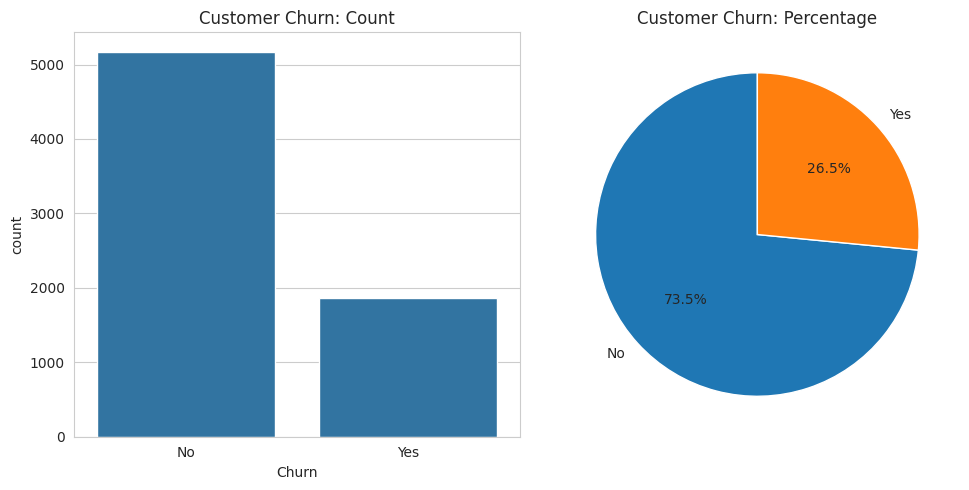

Customers who DID NOT churn: 5174 (73.5%)
Customers who CHURNED: 1869 (26.5%)


In [ ]:
# === VISUALIZE CHURN DISTRIBUTION ===
plt.figure(figsize=(10, 5))

# First subplot - Count plot
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Churn')
plt.title('Customer Churn: Count')

# Second subplot - Pie chart
plt.subplot(1, 2, 2)
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Churn: Percentage')

plt.tight_layout()
plt.show()

# Print the exact numbers
print(f"Customers who DID NOT churn: {churn_counts['No']} ({churn_counts['No']/len(df)*100:.1f}%)")
print(f"Customers who CHURNED: {churn_counts['Yes']} ({churn_counts['Yes']/len(df)*100:.1f}%)")

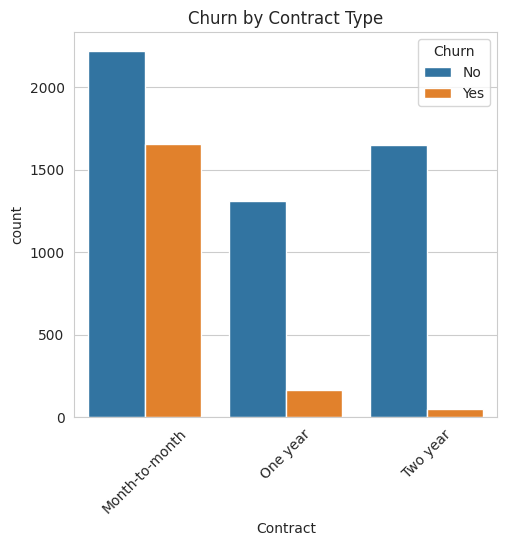

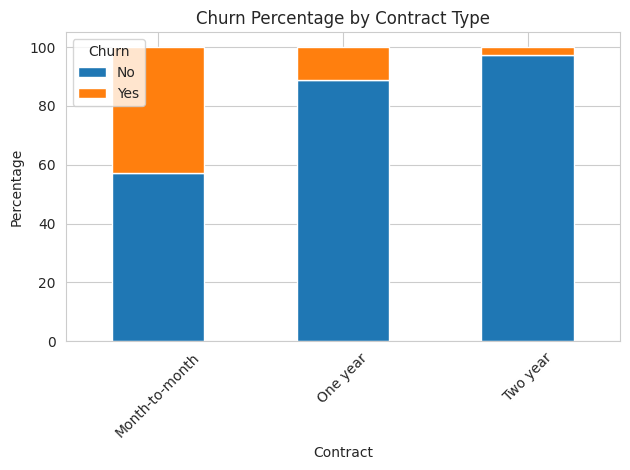

In [ ]:
# == HOW CONTRACT TYPE AFFECTS CHURN ==
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.xticks(rotation=45)

plt.subplot(1, 2, 1)
# Calculate churn rates by contract type
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', stacked=True)
plt.title('Churn Percentage by Contract Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

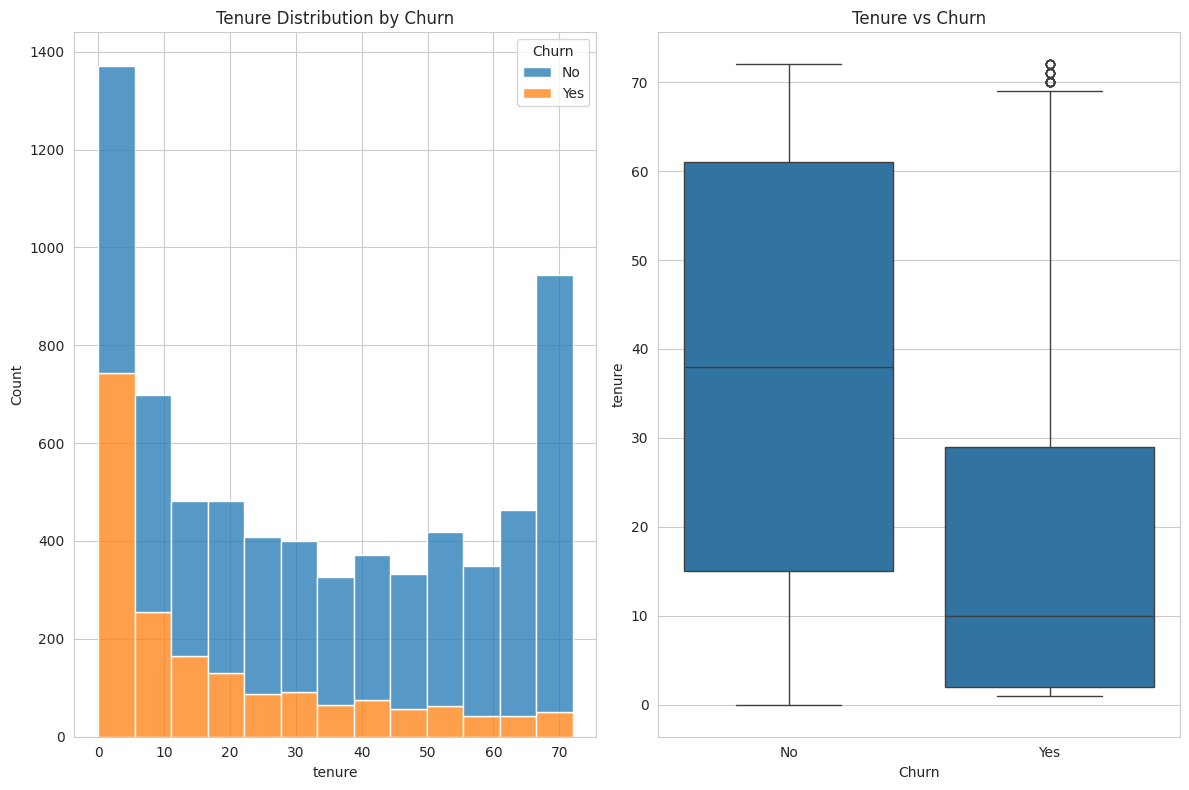

In [ ]:
# === HOW TENURE AFFECTS CHURN ===
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='tenure', hue='Churn', multiple="stack", bins=13)
plt.title('Tenure Distribution by Churn')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure vs Churn')

plt.tight_layout()
plt.show()

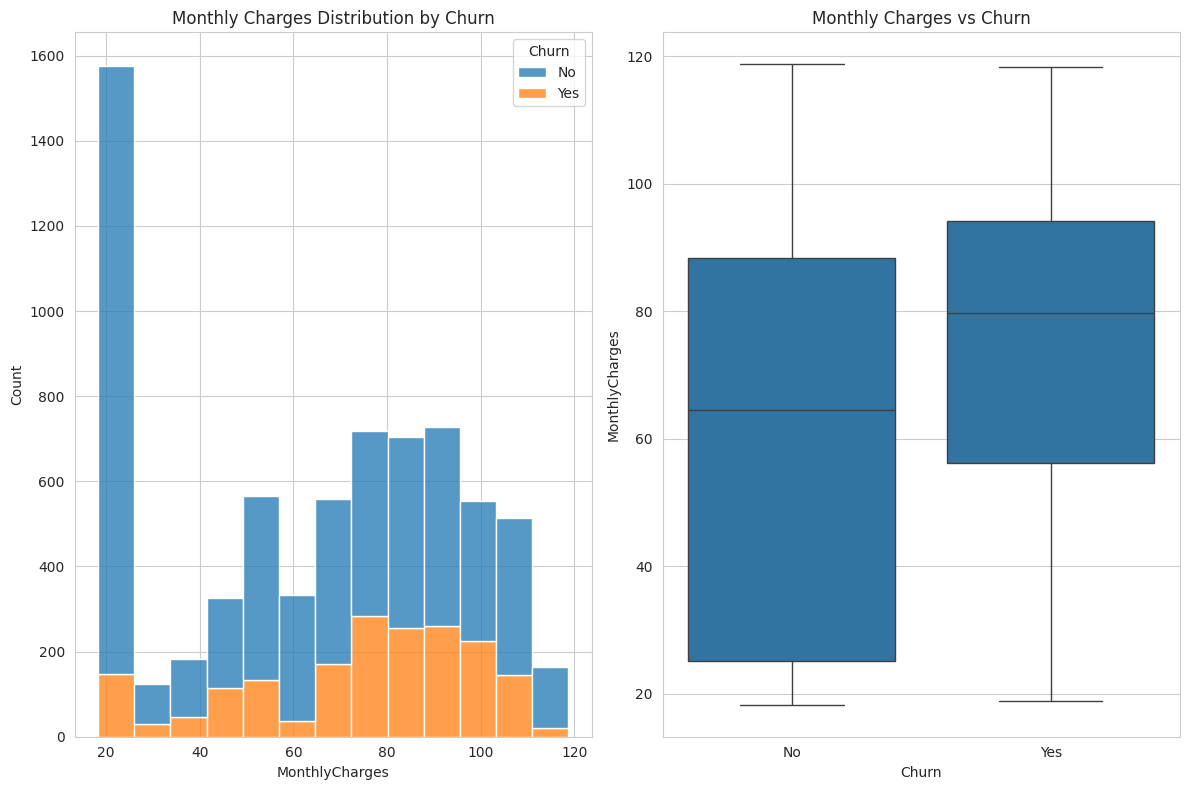

In [ ]:

# === HOW MONTHLY CHARGES AFFECT CHURN ===
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple="stack", bins=13)
plt.title('Monthly Charges Distribution by Churn')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs Churn')

plt.tight_layout()
plt.show()

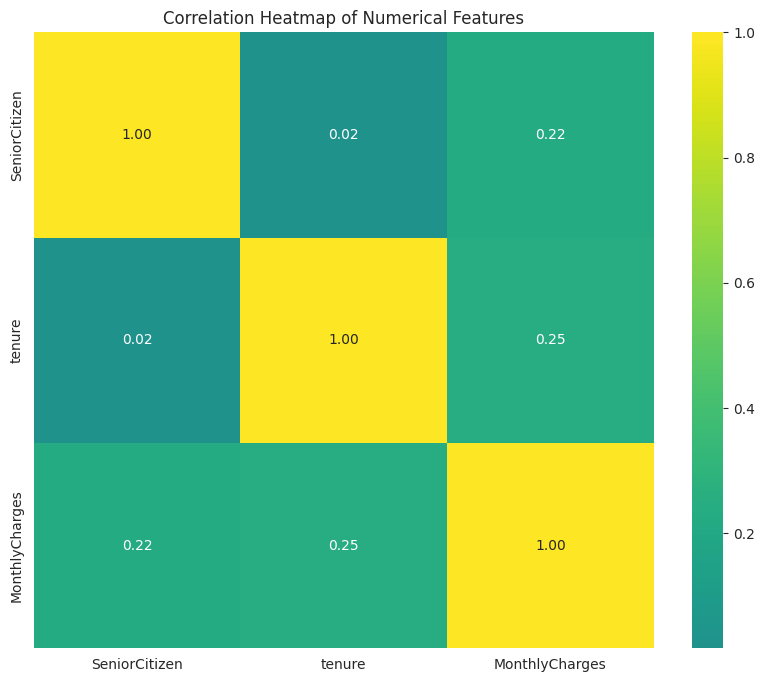

In [ ]:
# === CORRELATION BETWEEN NUMERICAL FEATURES ===
plt.figure(figsize=(10, 8))

# Select only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", center=0, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# === DATA QUALITY CHECK ===
print("== DATA QUALITY SUMMARY ==")
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

# Check for any whitespace or strange values in categorical columns
print("\n=== CHECKING FOR DATA ISSUES ===")
for col in df.select_dtypes(include=['object']).columns:
    if col != 'customerID':  # Skip customer ID
        unique_vals = df[col].unique()
        print(f"{col}: {len(unique_vals)} unique values")
        if len(unique_vals) < 10:  # Only show if not too many values
            print(f"   Values: {unique_vals}")

== DATA QUALITY SUMMARY ==
Total missing values: 0
Duplicate rows: 0

=== CHECKING FOR DATA ISSUES ===
gender: 2 unique values
   Values: ['Female' 'Male']
Partner: 2 unique values
   Values: ['Yes' 'No']
Dependents: 2 unique values
   Values: ['No' 'Yes']
PhoneService: 2 unique values
   Values: ['No' 'Yes']
MultipleLines: 3 unique values
   Values: ['No phone service' 'No' 'Yes']
InternetService: 3 unique values
   Values: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
OnlineBackup: 3 unique values
   Values: ['Yes' 'No' 'No internet service']
DeviceProtection: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
TechSupport: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
StreamingTV: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
StreamingMovies: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
Contract: 3 unique values
   Values: ['Month-to-month' 'One year' 'Two year']
Pap

In [ ]:
# === KEY INSIGHTS SUMMARY ===
print("== KEY INSIGHTS FROM EDA ==")

# Insight 1: Overall churn rate
churn_rate = (df['Churn'] == 'Yes').mean() * 100
print(f"1. Overall churn rate: {churn_rate:.1f}%")

# Insight 2: Churn by contract type
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"\n2. Churn rate by contract type:")
for contract, rate in contract_churn.items():
    print(f"   - {contract}: {rate:.1f}%")

# Insight 3: Average tenure difference
tenure_churn = df.groupby('Churn')['tenure'].mean()
print(f"\n3. Average tenure:")
print(f"   - Churned customers: {tenure_churn['Yes']:.1f} months")
print(f"   - Stayed customers: {tenure_churn['No']:.1f} months")

# Insight 4: Monthly charges difference
charges_churn = df.groupby('Churn')['MonthlyCharges'].mean()
print(f"\n4. Average monthly charges:")
print(f"   - Churned customers: ${charges_churn['Yes']:.2f}")
print(f"   - Stayed customers: ${charges_churn['No']:.2f}")

== KEY INSIGHTS FROM EDA ==
1. Overall churn rate: 26.5%

2. Churn rate by contract type:
   - Month-to-month: 42.7%
   - One year: 11.3%
   - Two year: 2.8%

3. Average tenure:
   - Churned customers: 18.0 months
   - Stayed customers: 37.6 months

4. Average monthly charges:
   - Churned customers: $74.44
   - Stayed customers: $61.27


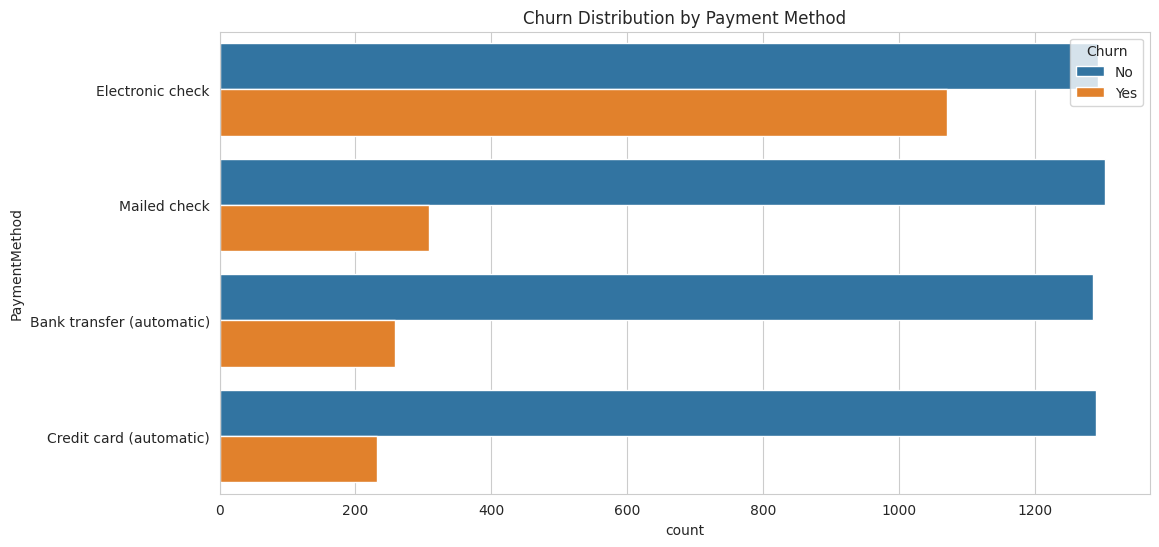

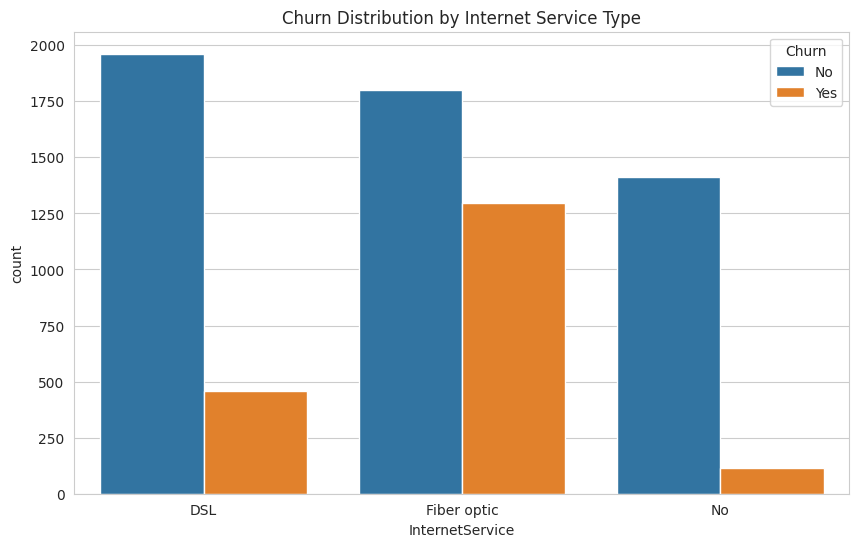

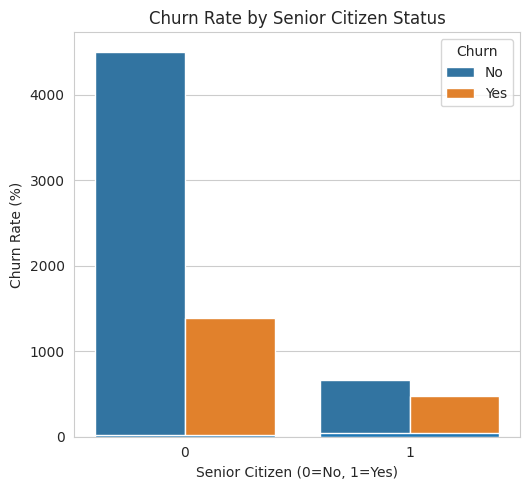

In [ ]:
# === ADDITIONAL KEY VISUALIZATIONS ===

# Payment Method vs Churn
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='PaymentMethod', hue='Churn')
plt.title('Churn Distribution by Payment Method')
plt.show()

# Internet Service Type vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn Distribution by Internet Service Type')
plt.show()

# Senior Citizen analysis
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title('Churn by Senior Citizen Status')

plt.subplot(1, 2, 1)
senior_churn = df.groupby('SeniorCitizen')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
plt.bar(senior_churn.index, senior_churn.values)
plt.title('Churn Rate by Senior Citizen Status')
plt.xlabel('Senior Citizen (0=No, 1=Yes)')
plt.ylabel('Churn Rate (%)')
plt.tight_layout()
plt.show()

Task **2**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.tree import DecisionTreeClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# Load the Telco Customer Churn dataset from GitHub
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)
print("\n load the data set successfully")



 load the data set successfully


remove customer id

In [ ]:
df = df.drop("customerID", axis=1)


convert total charges to numeric

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(0)


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix


encode target variable

In [ ]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


SPLIT NUMERIC & CATEGORICAL FEATURES

In [ ]:
categorical_cols = df.select_dtypes(include=["object"]).columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop("Churn")


PREPROCESSING FOR NEURAL NETWORK (One-Hot Encode + Scale)

In [ ]:
df_nn = pd.get_dummies(df, drop_first=True)
X_nn = df_nn.drop("Churn", axis=1)
y_nn = df_nn["Churn"]
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    X_nn, y_nn, test_size=0.2, stratify=y_nn, random_state=42
)
scaler = StandardScaler()
X_train_nn[numeric_cols] = scaler.fit_transform(X_train_nn[numeric_cols])
X_test_nn[numeric_cols] = scaler.transform(X_test_nn[numeric_cols])


Build the nurel netwrk model

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train_nn.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(
    X_train_nn, y_train_nn,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6672 - loss: 0.6084 - val_accuracy: 0.7808 - val_loss: 0.4586
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7871 - loss: 0.4450 - val_accuracy: 0.7906 - val_loss: 0.4448
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8082 - loss: 0.4071 - val_accuracy: 0.7986 - val_loss: 0.4410
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8105 - loss: 0.4131 - val_accuracy: 0.8039 - val_loss: 0.4420
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8097 - loss: 0.4029 - val_accuracy: 0.7888 - val_loss: 0.4435
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8105 - loss: 0.4047 - val_accuracy: 0.8004 - val_loss: 0.4439
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8110 - loss: 0.4064 - val_accuracy: 0.7959 - val_loss: 0.4389
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8194 - loss: 0.3944 - val_accuracy: 0.7950 - val_

evaluate nural network

In [ ]:
y_pred_nn = (model.predict(X_test_nn) > 0.5).astype(int)

print("ANN Classification Report:")
print(classification_report(y_test_nn, y_pred_nn))

print("ANN ROC-AUC:", roc_auc_score(y_test_nn, y_pred_nn))


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
ANN Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.61      0.52      0.56       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409

ANN ROC-AUC: 0.6993425301609445


PREPROCESSING FOR DECISION TREE (Label Encoding Only)

In [ ]:
df_dt = df.copy()
le = LabelEncoder()
for col in categorical_cols:
    df_dt[col] = le.fit_transform(df_dt[col])
X_dt = df_dt.drop("Churn", axis=1)
y_dt = df_dt["Churn"]
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_dt, y_dt, test_size=0.2, stratify=y_dt, random_state=42
)


DECISION TREE TRAINING WITH GRID SEARCH

In [ ]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [4, 6, 8, 10, 12],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(dt, param_grid, cv=5, scoring="accuracy")
grid_dt.fit(X_train_dt, y_train_dt)

best_dt = grid_dt.best_estimator_


EVALUATE DECISION TREE

In [ ]:
y_pred_dt = best_dt.predict(X_test_dt)

print("Decision Tree Classification Report:")
print(classification_report(y_test_dt, y_pred_dt))

print("Decision Tree ROC-AUC:", roc_auc_score(y_test_dt, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1035
           1       0.66      0.31      0.43       374

    accuracy                           0.78      1409
   macro avg       0.73      0.63      0.64      1409
weighted avg       0.76      0.78      0.75      1409

Decision Tree ROC-AUC: 0.6279146968405281


FINAL MODEL COMPARISON

In [ ]:
print("=== FINAL MODEL PERFORMANCE ===")
print("ANN Accuracy:", accuracy_score(y_test_nn, y_pred_nn))
print("DT Accuracy :", accuracy_score(y_test_dt, y_pred_dt))

print("ANN ROC-AUC:", roc_auc_score(y_test_nn, y_pred_nn))
print("DT ROC-AUC :", roc_auc_score(y_test_dt, y_pred_dt))


=== FINAL MODEL PERFORMANCE ===
ANN Accuracy: 0.7828246983676366
DT Accuracy : 0.7757274662881476
ANN ROC-AUC: 0.6993425301609445
DT ROC-AUC : 0.6279146968405281


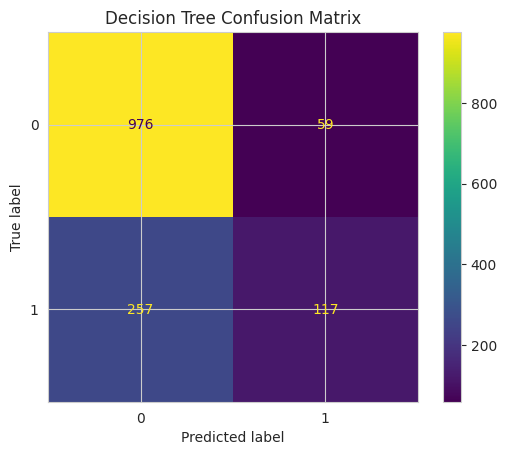

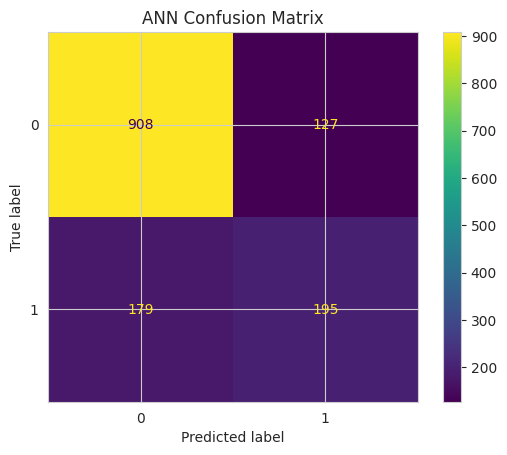

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test_dt, y_pred_dt)
plt.title("Decision Tree Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test_nn, y_pred_nn)
plt.title("ANN Confusion Matrix")
plt.show()


Task 3

In [ ]:
# make aliases so visualization code can use consistent names
dt_model = best_dt        # Decision Tree best estimator from GridSearchCV
ann_model = model         # ANN model (Keras Sequential model)


Correct Metrics & Repor

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Probabilities for AUC
# Decision Tree
dt_probs = dt_model.predict_proba(X_test_dt)[:, 1]

# ANN: ann_model.predict returns probabilities (sigmoid output)
ann_probs = ann_model.predict(X_test_nn).ravel()

# Predicted classes (you already have these but recompute if needed)
y_pred_dt = (dt_model.predict(X_test_dt)).astype(int)
y_pred_nn = (ann_model.predict(X_test_nn) > 0.5).astype(int).ravel()

print("=== FINAL MODEL PERFORMANCE ===")
print(f"ANN Accuracy: {accuracy_score(y_test_nn, y_pred_nn):.3f}")
print(f"DT Accuracy : {accuracy_score(y_test_dt, y_pred_dt):.3f}")
print(f"ANN ROC-AUC: {roc_auc_score(y_test_nn, ann_probs):.3f}")
print(f"DT ROC-AUC : {roc_auc_score(y_test_dt, dt_probs):.3f}")

print("\n--- ANN Classification Report ---")
print(classification_report(y_test_nn, y_pred_nn))

print("\n--- Decision Tree Classification Report ---")
print(classification_report(y_test_dt, y_pred_dt))


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
=== FINAL MODEL PERFORMANCE ===
ANN Accuracy: 0.783
DT Accuracy : 0.776
ANN ROC-AUC: 0.821
DT ROC-AUC : 0.816

--- ANN Classification Report ---
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.61      0.52      0.56       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409


--- Decision Tree Classification Report ---
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1035
           1       0.66      0.31      0.43       374

    accuracy                           0.78      1409
   macro avg       0.73      0.63      0.64      1409
weighted avg       0.76      0.78      0.75      1409



confusion matrix

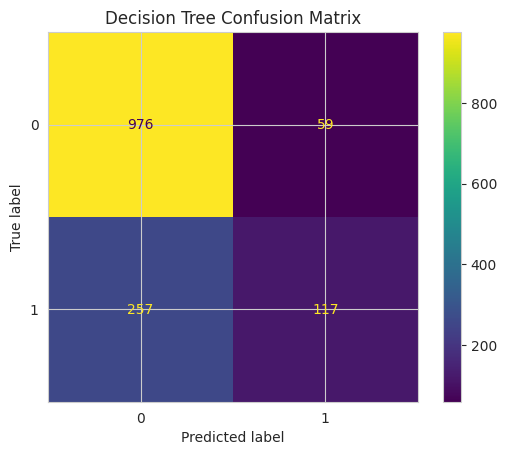

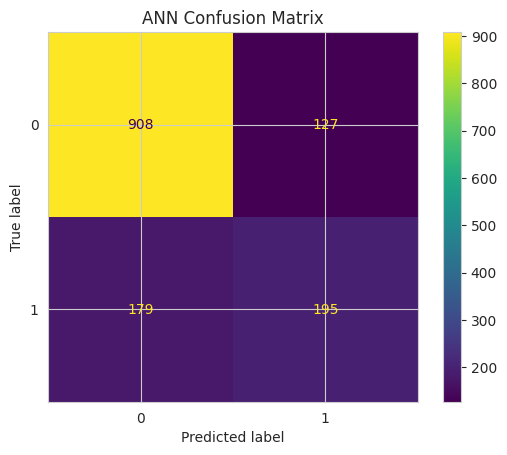

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Decision Tree
ConfusionMatrixDisplay.from_predictions(y_test_dt, y_pred_dt)
plt.title("Decision Tree Confusion Matrix")
plt.show()

# ANN
ConfusionMatrixDisplay.from_predictions(y_test_nn, y_pred_nn)
plt.title("ANN Confusion Matrix")
plt.show()


ROC curve

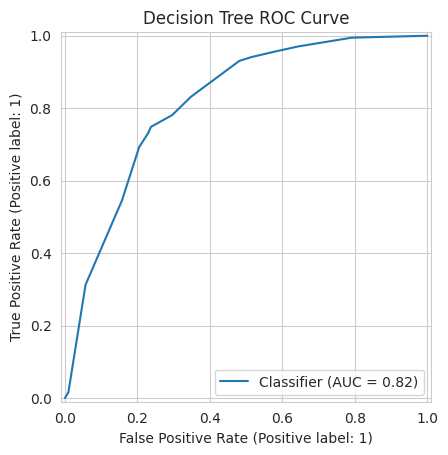

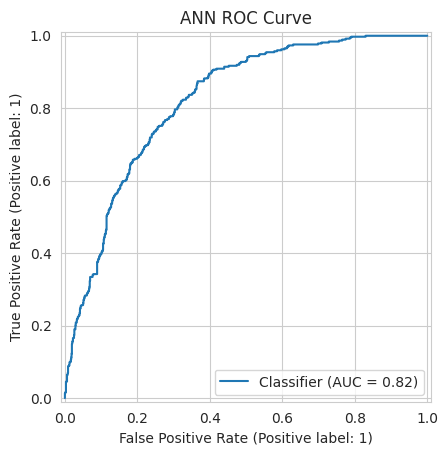

In [ ]:
from sklearn.metrics import RocCurveDisplay

# Decision Tree ROC Curve
RocCurveDisplay.from_predictions(y_test_dt, dt_probs)
plt.title("Decision Tree ROC Curve")
plt.show()

# ANN ROC Curve
RocCurveDisplay.from_predictions(y_test_nn, ann_probs)
plt.title("ANN ROC Curve")
plt.show()


Decssion tree feature importnace

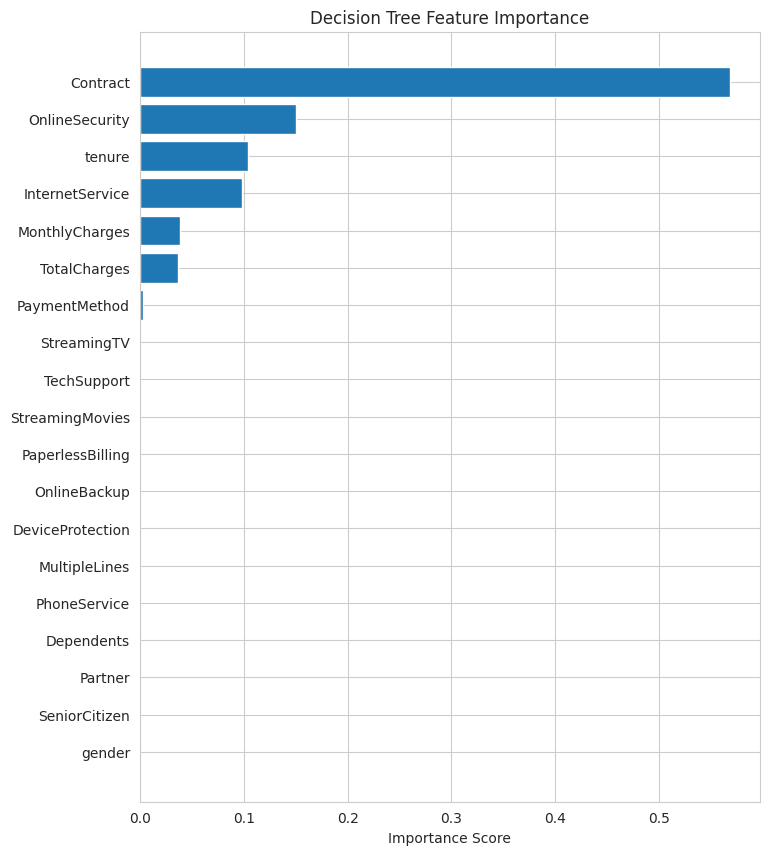

In [ ]:
plt.figure(figsize=(8, 10))
feature_names = X_dt.columns  # features used to train the Decision Tree
importances = dt_model.feature_importances_
# sort for nicer plotting
idx = importances.argsort()
plt.barh(feature_names[idx], importances[idx])
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance Score")
plt.show()


ANN training loss cruve

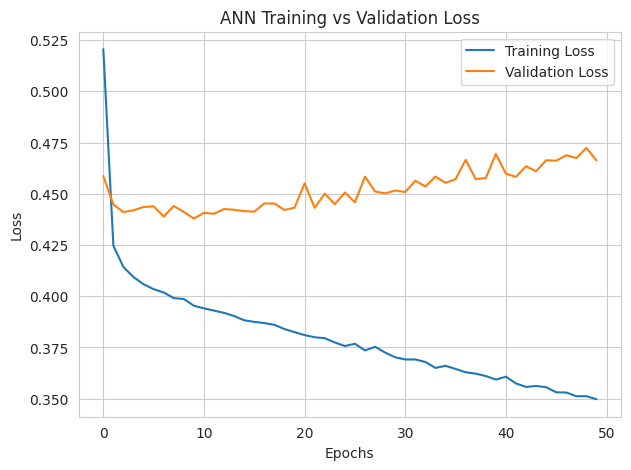

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("ANN Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
